In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install paddleocr
!pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=c59abf50f9e8947760b8e8d5ec6f8174c25e47cc845cc9f221eaefdd9a7c6576
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
   

In [ ]:
from paddleocr import PaddleOCR
import os
import pandas as pd

# CSV 파일 경로 및 이미지 경로
temp_csv_path = '/content/drive/MyDrive/PhotoQA/newimage.csv'
image_base_path = '/content/drive/MyDrive/PhotoQA/newimage_cropped/approved/'

# 결과 저장 파일 템플릿
batch_output_file_template = '/content/drive/MyDrive/PhotoQA/ocr_results_batch_{batch_idx}.txt'

# 데이터 로드 및 필터링
data = pd.read_csv(temp_csv_path)
data = data[(data['image_type'] == 'ExpiryImages') & (data['image_status'] == 'Approved')]

# OCR 초기화
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Batch size 설정
batch_size = 100

# 데이터프레임을 배치로 분할
batches = [data.iloc[i:i + batch_size] for i in range(0, len(data), batch_size)]

# 배치 처리 및 결과 저장
for batch_idx, batch in enumerate(batches):
    batch_results = {}

    # 배치별 OCR 처리
    for job_no, group in batch.groupby(['job_no']):
        batch_results[job_no] = {}
        for line_id, line_group in group.groupby('line_id'):
            line_texts = []

            for image_name in line_group['image_name']:
                image_path = os.path.join(image_base_path, image_name)
                try:
                    # OCR 실행
                    results = ocr.ocr(image_path)
                    for line in results[0]:
                        detected_text = line[1][0]
                        confidence = line[1][1]
                        line_texts.append(f"Text: {detected_text} (Confidence: {confidence:.2f})")
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

            # OCR 결과 저장
            batch_results[job_no][line_id] = line_texts

    # 배치 결과를 파일로 저장
    batch_output_file = batch_output_file_template.format(batch_idx=batch_idx + 1)
    with open(batch_output_file, 'w') as f:
        for job_no, line_groups in batch_results.items():
            f.write(f"Job No: {job_no}\n")
            for line_id, texts in line_groups.items():
                f.write(f"  Line ID: {line_id}\n")
                f.write("\n".join(texts))
                f.write("\n\n")

    print(f"Batch {batch_idx + 1}/{len(batches)} results saved to {batch_output_file}.")

print("모든 배치 처리 및 결과 저장이 완료되었습니다.")


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:17<00:00, 219.88it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:07<00:00, 1270.52it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:16<00:00, 132.12it/s]

[2024/12/03 01:20:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

Streaming output truncated to the last 5000 lines.
[2024/12/03 01:50:28] ppocr DEBUG: cls num  : 15, elapsed : 0.07810306549072266
[2024/12/03 01:50:30] ppocr DEBUG: rec_res num  : 15, elapsed : 2.168757200241089
[2024/12/03 01:50:31] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.21164965629577637
[2024/12/03 01:50:31] ppocr DEBUG: cls num  : 33, elapsed : 0.15314912796020508
[2024/12/03 01:50:36] ppocr DEBUG: rec_res num  : 33, elapsed : 4.6464927196502686
[2024/12/03 01:50:36] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.1304640769958496
[2024/12/03 01:50:36] ppocr DEBUG: cls num  : 12, elapsed : 0.0410771369934082
[2024/12/03 01:50:38] ppocr DEBUG: rec_res num  : 12, elapsed : 1.8743174076080322
Batch 7/85 results saved to /content/drive/MyDrive/PhotoQA/ocr_results_batch_7.txt.
[2024/12/03 01:50:38] ppocr DEBUG: dt_boxes num : 29, elapsed : 0.14695501327514648
[2024/12/03 01:50:38] ppocr DEBUG: cls num  : 29, elapsed : 0.11845517158508301
[2024/12/03 01:50:42] ppocr DEBUG: rec_res num 

In [ ]:
from paddleocr import PaddleOCR
import os
import pandas as pd

# CSV 파일 경로 및 이미지 경로
temp_csv_path = '/content/drive/MyDrive/PhotoQA/newimage.csv'
image_base_path = '/content/drive/MyDrive/PhotoQA/newimage_cropped/approved/'

# 결과 저장 파일 템플릿
batch_output_file_template = '/content/drive/MyDrive/PhotoQA/ocr_results_batch_{batch_idx}.txt'

# 데이터 로드 및 필터링
data = pd.read_csv(temp_csv_path)
data = data[(data['image_type'] == 'ExpiryImages') & (data['image_status'] == 'Approved')]

# OCR 초기화
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Batch size 설정
batch_size = 100

# 기존 배치 인덱스부터 시작
start_batch_idx = 55

# 배치 시작점에 맞게 데이터 슬라이싱
remaining_batches = [data.iloc[i:i + batch_size] for i in range((start_batch_idx - 1) * batch_size, len(data), batch_size)]

# 배치 처리 및 결과 저장 (23번째 배치부터 시작)
for batch_idx, batch in enumerate(remaining_batches, start=start_batch_idx):
    batch_results = {}

    # 배치별 OCR 처리
    for job_no, group in batch.groupby(['job_no']):
        batch_results[job_no] = {}
        for line_id, line_group in group.groupby('line_id'):
            line_texts = []

            for image_name in line_group['image_name']:
                image_path = os.path.join(image_base_path, image_name)
                try:
                    # OCR 실행
                    results = ocr.ocr(image_path)
                    for line in results[0]:
                        detected_text = line[1][0]
                        confidence = line[1][1]
                        line_texts.append(f"Text: {detected_text} (Confidence: {confidence:.2f})")
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

            # OCR 결과 저장
            batch_results[job_no][line_id] = line_texts

    # 배치 결과를 파일로 저장
    batch_output_file = batch_output_file_template.format(batch_idx=batch_idx)
    with open(batch_output_file, 'w') as f:
        for job_no, line_groups in batch_results.items():
            f.write(f"Job No: {job_no}\n")
            for line_id, texts in line_groups.items():
                f.write(f"  Line ID: {line_id}\n")
                f.write("\n".join(texts))
                f.write("\n\n")

    print(f"Batch {batch_idx}/{start_batch_idx + len(remaining_batches) - 1} results saved to {batch_output_file}.")

print("23번째 배치부터 모든 배치 처리 및 결과 저장이 완료되었습니다.")


Streaming output truncated to the last 5000 lines.
[2024/12/06 05:00:34] ppocr DEBUG: cls num  : 27, elapsed : 0.15595626831054688
[2024/12/06 05:00:38] ppocr DEBUG: rec_res num  : 27, elapsed : 3.9778993129730225
[2024/12/06 05:00:39] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.11771488189697266
[2024/12/06 05:00:39] ppocr DEBUG: cls num  : 7, elapsed : 0.05665445327758789
[2024/12/06 05:00:40] ppocr DEBUG: rec_res num  : 7, elapsed : 1.191483497619629
[2024/12/06 05:00:42] ppocr DEBUG: dt_boxes num : 29, elapsed : 0.13324642181396484
[2024/12/06 05:00:42] ppocr DEBUG: cls num  : 29, elapsed : 0.10870027542114258
[2024/12/06 05:00:44] ppocr DEBUG: rec_res num  : 29, elapsed : 2.5783979892730713
[2024/12/06 05:00:45] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.12182283401489258
[2024/12/06 05:00:45] ppocr DEBUG: cls num  : 10, elapsed : 0.06454992294311523
[2024/12/06 05:00:47] ppocr DEBUG: rec_res num  : 10, elapsed : 1.5840327739715576
[2024/12/06 05:00:48] ppocr DEBUG: dt_boxes num :

#legacy

In [ ]:
# from paddleocr import PaddleOCR
# import os
# import pandas as pd

# temp_csv_path = '/content/drive/MyDrive/PhotoQA/newimage.csv'

# data  = pd.read_csv(temp_csv_path)

# data = data[(data['image_type'] == 'ExpiryImages') & (data['image_status'] == 'Approved')]

# # OCR 초기화
# ocr = PaddleOCR(use_angle_cls=True, lang='en')

# # 이미지 경로 기본 설정
# image_base_path = '/content/drive/MyDrive/PhotoQA/newimage_cropped/approved/'

# # 결과 저장을 위한 딕셔너리
# ocr_results = {}

# # 각 job_no와 line_id로 그룹화
# for job_no, group in data.groupby(['job_no']):
#     ocr_results[job_no] = {}
#     for line_id, line_group in group.groupby('line_id'):
#         line_texts = []

#         # 개별 이미지에서 텍스트 추출
#         for image_name in line_group['image_name']:
#             image_path = os.path.join(image_base_path, image_name)
#             try:
#                 # OCR 실행
#                 results = ocr.ocr(image_path)
#                 for line in results[0]:
#                     detected_text = line[1][0]
#                     confidence = line[1][1]
#                     line_texts.append(f"Text: {detected_text} (Confidence: {confidence:.2f})")
#             except Exception as e:
#                 print(f"Error processing {image_path}: {e}")

#         # 추출된 텍스트를 line_id에 저장
#         ocr_results[job_no][line_id] = line_texts

# # 결과를 파일로 저장
# output_file = '/content/drive/MyDrive/PhotoQA/ocr_results_by_line_id.txt'
# with open(output_file, 'w') as f:
#     for job_no, line_groups in ocr_results.items():
#         f.write(f"Job No: {job_no}\n")
#         for line_id, texts in line_groups.items():
#             f.write(f"  Line ID: {line_id}\n")
#             f.write("\n".join(texts))
#             f.write("\n\n")

# print(f"OCR 결과가 {output_file}에 저장되었습니다.")


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:00<00:00, 5514.18it/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:00<00:00, 12447.18it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:00<00:00, 3750.03it/s]

[2024/12/02 02:09:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

[2024/12/02 02:10:09] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.2658524513244629
[2024/12/02 02:10:09] ppocr DEBUG: cls num  : 1, elapsed : 0.026498794555664062
[2024/12/02 02:10:10] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07371878623962402
[2024/12/02 02:10:10] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.10665011405944824
[2024/12/02 02:10:11] ppocr DEBUG: cls num  : 16, elapsed : 0.0775296688079834
[2024/12/02 02:10:12] ppocr DEBUG: rec_res num  : 16, elapsed : 1.04331374168396
[2024/12/02 02:10:13] ppocr DEBUG: dt_boxes num : 32, elapsed : 0.11952972412109375
[2024/12/02 02:10:13] ppocr DEBUG: cls num  : 32, elapsed : 0.09419536590576172
[2024/12/02 02:10:16] ppocr DEBUG: rec_res num  : 32, elapsed : 3.242279052734375
[2024/12/02 02:10:17] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.14253902435302734
[2024/12/02 02:10:17] ppocr DEBUG: cls num  : 16, elapsed : 0.047936201095581055
[2024/12/02 02:10:20] ppocr DEBUG: rec_res num  : 16, elapsed : 3.0602564811706543
[2024/12/02 02:10

In [ ]:
import os
import pandas as pd
from PIL import Image
from paddleocr import PaddleOCR
import matplotlib.pyplot as plt


In [ ]:
ocr = PaddleOCR(use_angle_cls = True, lang = 'en')

temp_image_path = '/content/drive/MyDrive/PhotoQA/newimage_cropped/approved/724316147-smokealarm-entrance.jpg'
results = ocr.ocr(temp_image_path)

for line in results[0]:
    print(f"Detected text: {line[1][0]} (Confidence: {line[1][1]:.2f})")

<function matplotlib.pyplot.show(close=None, block=None)>

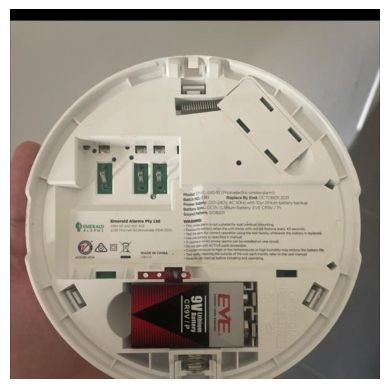

In [ ]:
img = Image.open(temp_image_path)

plt.imshow(img)
plt.axis('off')
plt.show

In [ ]:
ocr = PaddleOCR(use_angle_cls = True, lang = 'en')

temp_image_path = '/content/drive/MyDrive/PhotoQA/newimage_cropped/approved/724227407-smokealarm-bedroom-2.jpg'
results = ocr.ocr(temp_image_path)

for line in results[0]:
    print(f"Detected text: {line[1][0]} (Confidence: {line[1][1]:.2f})")



[2024/11/28 06:28:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

<function matplotlib.pyplot.show(close=None, block=None)>

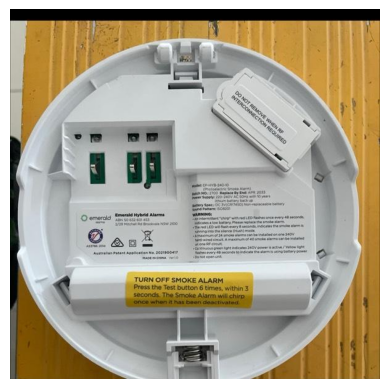

In [ ]:
img = Image.open(temp_image_path)

plt.imshow(img)
plt.axis('off')
plt.show